In [120]:
import numpy as np
import matplotlib.pyplot as plt

In [121]:
class TransportationProblem(object):
    def __init__(self, n):
        self.n = n
    
    def initialState(self):
        return 1
    
    def isEnd(self, state):
        return state == self.n
    
    def actions(self, state):
        moves = []
        if state + 1 <= self.n:
            moves.append('walk')
        if state * 2 <= self.n:
            moves.append('tram')
        return moves
    
    def cost(self, action):
        if action == 'walk':
            return -1
        if action == 'tram':
            return -2
    
    def successor(self, state, action):
        if action == 'walk':
            return state + 1
        if action == 'tram':
            return state * 2

In [122]:
problem = TransportationProblem(n=6)

In [123]:
def walk_tram(problem, state):
    if state != 3:
        return problem.cost('walk'), state, [state+1], 1
    if state == 3:
        return problem.cost('tram'), state, [state*2, state], 0.5

In [124]:
def just_walk(problem, state):
    return problem.cost('walk'), state, [state+1], 1

In [125]:
def policy_evaluation(problem, policy, gamma):
    exp_values= np.zeros(problem.n)
    max_iterations = 1000
    convergence = 10**(-6)
    for _ in range(max_iterations):
        new_exp_values = np.zeros(problem.n)
        actual_state = problem.initialState()
        for _ in range(problem.n):
            cost, state, future_states, prob = policy(problem, actual_state)
            total_sum = 0
            for future_state in future_states:
                total_sum += prob * (cost + gamma * exp_values[future_state-1])
            new_exp_values[state-1]+=total_sum
            actual_state = future_states[0]
            if problem.isEnd(actual_state):
                break
        if np.max(np.abs(new_exp_values-exp_values))<=convergence:
            return new_exp_values
        else:
            exp_values = new_exp_values.copy()
    return exp_values

In [126]:
def expected_value_walktram(gamma):
    return (4*gamma**2)/(gamma-2)-gamma-1

In [127]:
def expected_value_justwalk(gamma):
    return -(1+gamma+gamma**2+gamma**3+gamma**4)

In [128]:
gamma=1/4
print(expected_value_walktram(gamma))
print(policy_evaluation(problem, walk_tram, gamma)[0])

-1.3928571428571428
-1.3928570747375488


In [129]:
gamma=1/2
print(expected_value_walktram(gamma))
print(policy_evaluation(problem, walk_tram, gamma)[0])

-2.1666666666666665
-2.1666665077209473


In [130]:
gamma=3/4
print(expected_value_walktram(gamma))
print(policy_evaluation(problem, walk_tram, gamma)[0])

-3.55
-3.549999724721186


In [131]:
gamma=1
print(expected_value_walktram(gamma))
print(policy_evaluation(problem, walk_tram, gamma)[0])

-6.0
-5.999999046325684


In [132]:
gamma=0.2
print(expected_value_walktram(gamma))
print(policy_evaluation(problem, walk_tram, gamma)[0])

-1.288888888888889
-1.2888888


In [133]:
#Solución analítica
gamma = np.linspace(0, 1, 100)
analitic_walktram=expected_value_walktram(gamma)
analitic_justwalk=expected_value_justwalk(gamma)

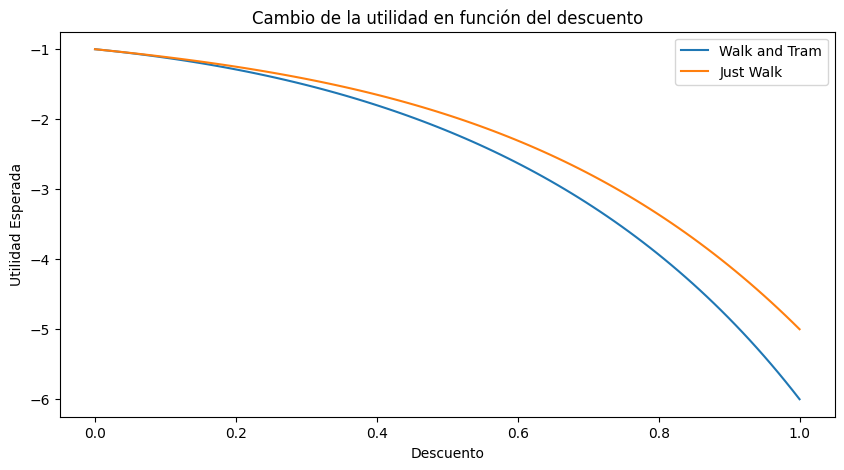

In [134]:
plt.figure(figsize=(10, 5))
plt.plot(gamma, analitic_walktram,label = 'Walk and Tram')
plt.plot(gamma, analitic_justwalk,label = 'Just Walk')
plt.xlabel('Descuento')
plt.ylabel('Utilidad Esperada')
plt.title('Cambio de la utilidad en función del descuento')
plt.legend()
plt.show()

In [135]:
just_walk_aprox = []
for g in gamma:
    just_walk_aprox.append(policy_evaluation(problem, just_walk, g)[0])

walk_tram_aprox = []
for g in gamma:
    walk_tram_aprox.append(policy_evaluation(problem, walk_tram, g)[0])

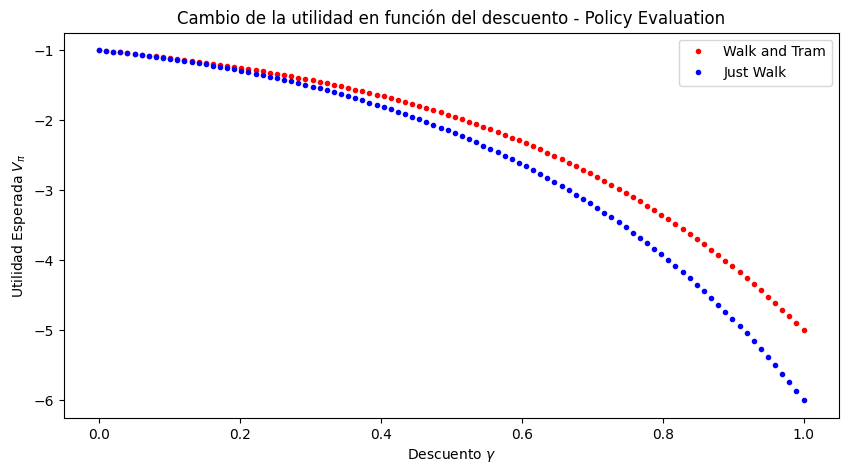

In [136]:
plt.figure(figsize=(10, 5))
plt.plot(gamma, just_walk_aprox, '.r' , label = 'Walk and Tram')
plt.plot(gamma, walk_tram_aprox, '.b' ,label = 'Just Walk')
plt.xlabel('Descuento $\gamma$')
plt.ylabel('Utilidad Esperada $V_{\pi}$')
plt.title('Cambio de la utilidad en función del descuento - Policy Evaluation')
plt.legend()
plt.show()

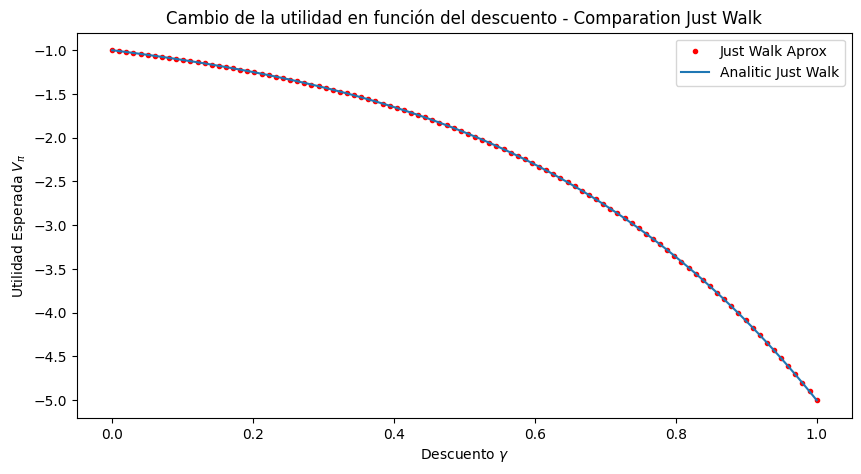

In [139]:
plt.figure(figsize=(10, 5))
plt.plot(gamma, just_walk_aprox, '.r' , label = 'Just Walk Aprox')
plt.plot(gamma, analitic_justwalk,label = 'Analitic Just Walk')
plt.xlabel('Descuento $\gamma$')
plt.ylabel('Utilidad Esperada $V_{\pi}$')
plt.title('Cambio de la utilidad en función del descuento - Comparation Just Walk')
plt.legend()
plt.show()

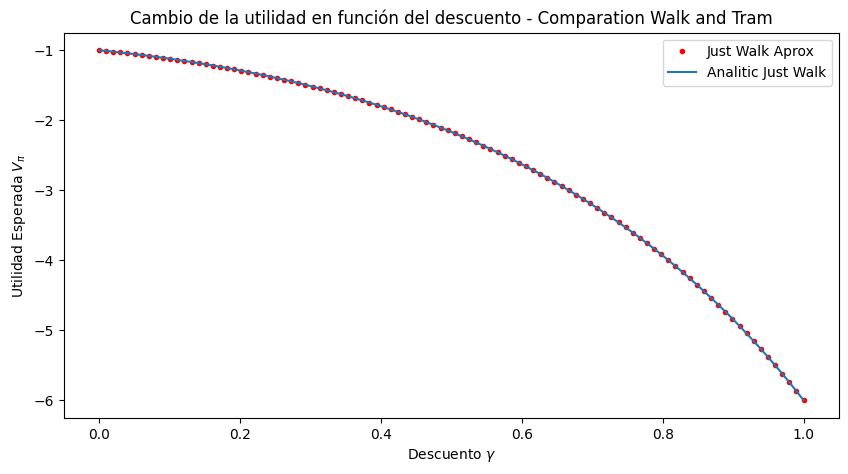

In [138]:
plt.figure(figsize=(10, 5))
plt.plot(gamma, walk_tram_aprox, '.r' , label = 'Just Walk Aprox')
plt.plot(gamma, analitic_walktram,label = 'Analitic Just Walk')
plt.xlabel('Descuento $\gamma$')
plt.ylabel('Utilidad Esperada $V_{\pi}$')
plt.title('Cambio de la utilidad en función del descuento - Comparation Walk and Tram')
plt.legend()
plt.show()